In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [4]:
def blocking(df, obs, time="t"):
    # blocking
    len_df = max(df[time])
    # blk_num = np.arange(1000, 10000)
    # blk_sizes = [len_df // i for i in blk_num]
    # blk_sizes = np.arange(2, np.floor(len_df), 100, dtype = int)
    blk_sizes = np.arange(2, 2000, 10, dtype = int)
    stdev = np.zeros(len(blk_sizes))
    
    for i, l in enumerate(blk_sizes):
        blk_avg = df[obs].groupby(df[time]//l).mean()
        stdev[i] = np.sqrt(blk_avg.var()/len(blk_avg))
    plt.plot(blk_sizes, stdev, '*-')
    window_size = 6
    kernel = np.ones(window_size) / window_size
    # plt.plot(blk_sizes, np.convolve(stdev, kernel, mode='same'), '*-')
    plt.xlabel("block length [ps]")
    if obs == "T":
        plt.ylabel("estimated error [K]")
        plt.title("Block analisys for the Temperature, hDHFR-MTX trajectory")
    elif obs == "P":
        plt.ylabel("estimated error [bar]")
        plt.title("Block analisys for the Pressure, hDHFR-MTX trajectory")
    #plt.ylim(0, 0.02)
    # plt.yscale("log")
    plt.show()

In [5]:
data_path0 = "../../data_3eig/02_processed/02_npt/prod_0/"
data_path1 = "../../data_3eig/02_processed/02_npt/prod_1/"
data_path2 = "../../data_3eig/02_processed/02_npt/prod_2/"
data_path3 = "../../data_3eig/02_processed/02_npt/prod_3/"
data_path4 = "../../data_3eig/02_processed/02_npt/prod_4/"
data_path5 = "../../data_3eig/02_processed/02_npt/prod_5/"
data_path6 = "../../data_3eig/02_processed/02_npt/prod_6/"
data_path7 = "../../data_3eig/02_processed/02_npt/prod_7/"
data_path8 = "../../data_3eig/02_processed/02_npt/prod_8/"

In [6]:
os.system("cat " + data_path7 + "07_prod7_header.txt")

# This file was created Fri Jan 31 22:33:04 2025
# Created by:
#                      :-) GROMACS - gmx energy, 2021.4 (-:
# 
# Executable:   /usr/local/gromacs/bin/gmx
# Data prefix:  /usr/local/gromacs
# Working dir:  /home/giacomo/comp_bio/cbp_final/data_3eig/02_processed/02_npt/prod_7
# Command line:
#   gmx energy -f step5_prod_7.edr -o 06_prod6_raw.xvg
# gmx energy is part of G R O M A C S:
#
# Gravel Rubs Often Many Awfully Cauterized Sores
#
@    title "GROMACS Energies"
@    xaxis  label "Time (ps)"
@    yaxis  label "(K), (bar), (kg/m^3)"
@TYPE xy
@ view 0.15, 0.15, 0.75, 0.85
@ legend on
@ legend box on
@ legend loctype view
@ legend 0.78, 0.8
@ legend length 2
@ s0 legend "Temperature"
@ s1 legend "Pressure"
@ s2 legend "Density"


0

In [7]:
tem_df0 = pd.read_csv(data_path0 + "00_prod0.xvg", header = None, names = ["t", "T", "P", "RMSD", "n"], sep = " ", skipinitialspace=True)
tem_df1 = pd.read_csv(data_path1 + "01_prod1.xvg", header = None, names = ["t", "T", "P", "RMSD", "n"], sep = " ", skipinitialspace=True)
tem_df2 = pd.read_csv(data_path2 + "02_prod2.xvg", header = None, names = ["t", "T", "P", "RMSD", "n"], sep = " ", skipinitialspace=True)
tem_df3 = pd.read_csv(data_path3 + "03_prod3.xvg", header = None, names = ["t", "UB", "T", "P", "RMSD", "n"], sep = " ", skipinitialspace=True)
tem_df4 = pd.read_csv(data_path4 + "04_prod4.xvg", header = None, names = ["t", "T", "P", "n"], sep = " ", skipinitialspace=True)
tem_df5 = pd.read_csv(data_path5 + "05_prod5.xvg", header = None, names = ["t", "T", "P", "n"], sep = " ", skipinitialspace=True)
tem_df6 = pd.read_csv(data_path6 + "06_prod6.xvg", header = None, names = ["t", "T", "P", "n"], sep = " ", skipinitialspace=True)
tem_df7 = pd.read_csv(data_path7 + "07_prod7.xvg", header = None, names = ["t", "T", "P", "n"], sep = " ", skipinitialspace=True)
tem_df8 = pd.read_csv(data_path8 + "08_prod8.xvg", header = None, names = ["t", "T", "P", "n"], sep = " ", skipinitialspace=True)
# third xvg has rows in different order cuz i am dumm -GM
tem_df3 = tem_df3[["t", "T", "P", "RMSD", "n"]]

In [8]:
# row0 = len(tem_df0)-1
# adj_term = tem_df0[0].iloc[-1] + 2
# tem_df1[0] = tem_df1[0] + adj_term

In [9]:
# concatenate 2 df
tem_df = pd.concat([tem_df0, tem_df1, tem_df2, tem_df3, tem_df4, tem_df5, tem_df6, tem_df7, tem_df8])
# Note - this solution is less general, as it assumes that the time step is 2 (ps), but is easier 
# to concatenate many dfs. 
# - GM
tem_df["t"] = 2 * np.arange(len(tem_df))

In [10]:
tem_df[["t", "T", "P"]].to_csv("/home/giacomo/comp_bio/cbp_final/data_3eig/02_processed/02_npt/obs_cat.xvg", sep = " ", header = False, index = False)

In [11]:
window_size = 300
window_size_P = 500

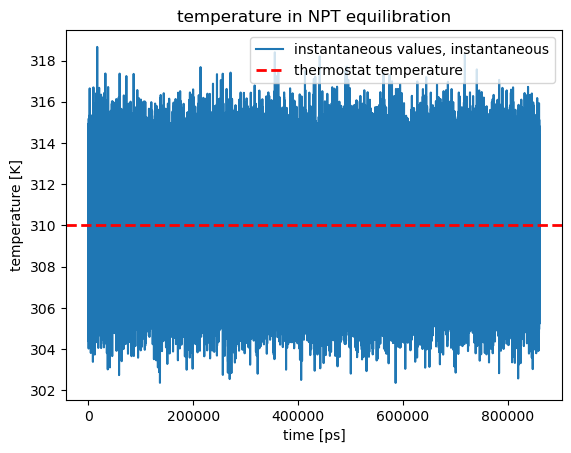

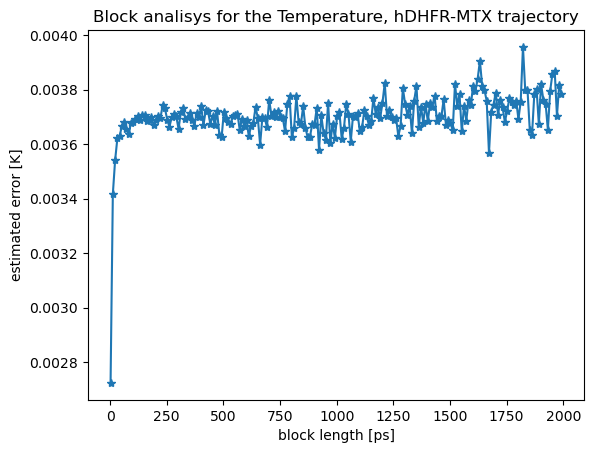

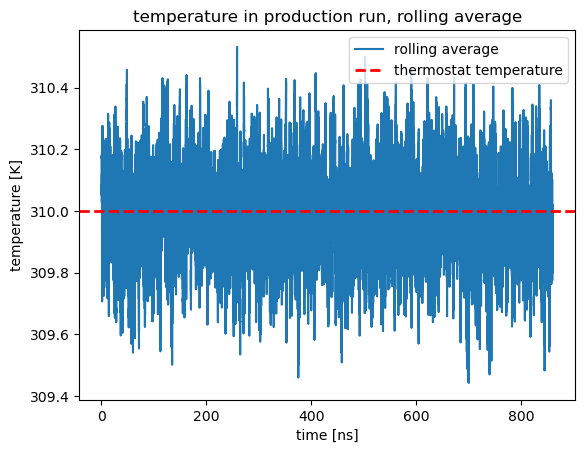

=== TOTAL AVERAGE: 309.9883834274283 \pm 0.004, sigma=0.002723234563164045 ===


In [12]:
plt.plot(tem_df["t"], tem_df["T"], label = "instantaneous values, instantaneous")
plt.title("temperature in NPT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("temperature [K]")
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

blocking(tem_df, obs = "T") # N_eff = 20, error \approx 0.1

errors_temp = np.sqrt(tem_df["T"].rolling(window_size).var() / 2)
error_temp = 4e-3
cum_temp = tem_df["T"].rolling(window_size).mean()
plt.plot(tem_df["t"] / 1000, cum_temp, label = "rolling average")
# plt.fill_between(tem_df["t"] / 1000, cum_temp + errors_temp, cum_temp - errors_temp, alpha=0.3)
plt.title("temperature in production run, rolling average")
plt.xlabel("time [ns]")
plt.ylabel("temperature [K]")
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

print(f"=== TOTAL AVERAGE: {tem_df["T"].mean()} \\pm {error_temp}, sigma={np.sqrt(tem_df["T"].var() / len(tem_df["T"]))} ===")

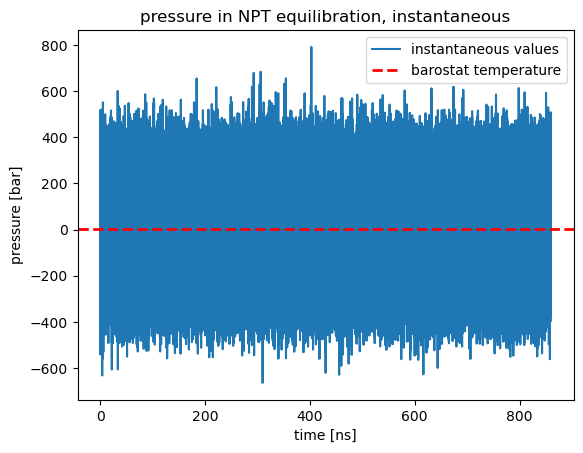

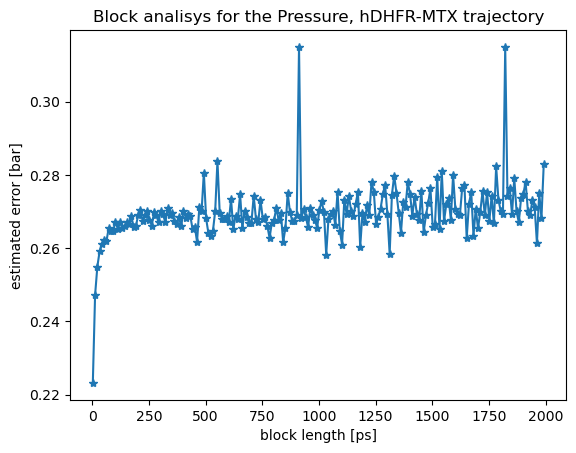

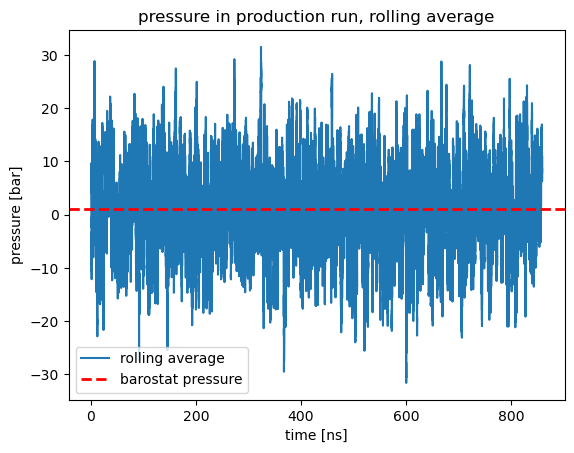

=== TOTAL AVERAGE: 1.17215083217328 \pm 0.3 ===


In [13]:
plt.plot(tem_df["t"] / 1000, tem_df["P"], label = "instantaneous values")
plt.title("pressure in NPT equilibration, instantaneous")
plt.xlabel("time [ns]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat temperature")
plt.legend()
plt.show()

blocking(tem_df, obs = "P") # N_eff = 20

cum_press = tem_df["P"].rolling(window_size_P, center = True).mean()
# errors_press = np.sqrt(tem_df["P"].rolling(window_size_P).var() / 2)
error_press = 0.3
plt.plot(tem_df["t"] / 1000, cum_press, label = "rolling average")
# plt.fill_between(tem_df["t"] / 1000, cum_press + errors_press, cum_press - errors_press, alpha=0.3)
plt.title("pressure in production run, rolling average")
plt.xlabel("time [ns]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat pressure")
plt.legend()
plt.show()

print(f"=== TOTAL AVERAGE: {tem_df["P"].mean()} \\pm {error_press} ===")

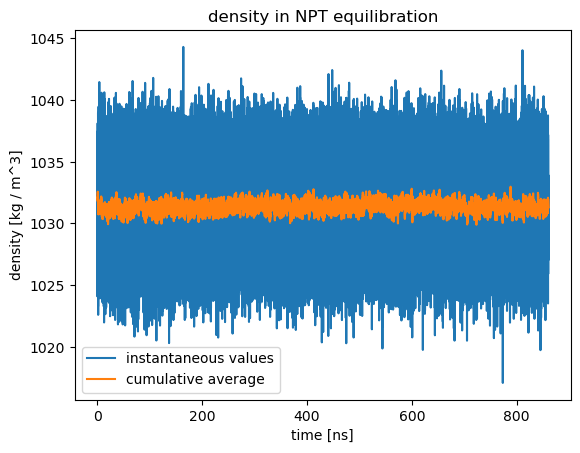

In [14]:
plt.plot(tem_df["t"] / 1000, tem_df["n"], label = "instantaneous values")
plt.plot(tem_df["t"] / 1000, tem_df["n"].rolling(window_size).mean(), label = "cumulative average")
plt.title("density in NPT equilibration")
plt.xlabel("time [ns]")
plt.ylabel("density [kg / m^3]")
plt.legend()
plt.show()